# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(study_results, mouse_metadata, how="left")
# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Combine the data into a single DataFrame
merged_df = pd.merge(study_results, mouse_metadata,  on="Mouse ID")

# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.


249

In [5]:
# Checking the number of mice.
len(merged_df["Mouse ID"].unique())

249

In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# merged_df.loc[merged_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"]
duplicate_mouse = merged_df.loc[merged_df.duplicated(), "Mouse ID"].unique()
duplicate_mouse_ID = duplicate_mouse[0]
duplicate_mouse

array(['g989'], dtype=object)

In [9]:
# Optional: Get all the data for the duplicate mouse ID.
merged_df.loc[(merged_df["Mouse ID"] == duplicate_mouse_ID)]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [11]:
# Checking the number of mice in the clean DataFrame.
# clean_df = merged_df.drop_duplicates(subset = ["Mouse ID", "Timepoint"], keep="first")
# clean_df = merged_df.drop_duplicates()
# WHY DONT THE ABOVE 2 LINES OF CODE WORK??????

clean_df = merged_df[merged_df['Mouse ID'].isin(duplicate_mouse)==False]
len(clean_df["Mouse ID"].unique())

248

## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.

mean = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({
    "Mean Tumor Volume":mean, "Median Tumor Volume":median, "Tumor Volume Variance": variance,
    "Tumor Volume Std. Dev.": std, "Tumor Volume Std. Err.": sem
})

summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary_df = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
agg_summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

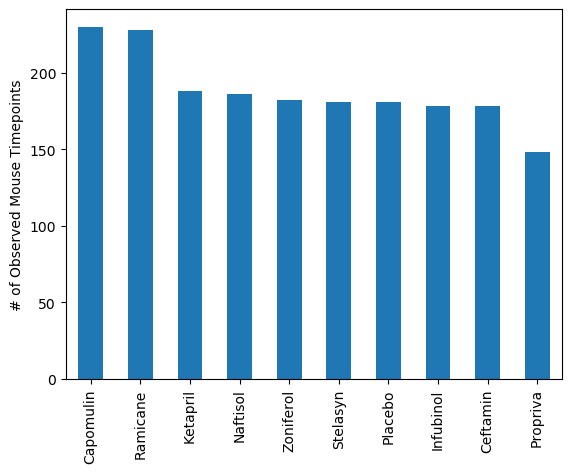

In [49]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_df = clean_df["Drug Regimen"].value_counts()
drug_regimen_pandas_plot = drug_regimen_df.plot.bar()
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

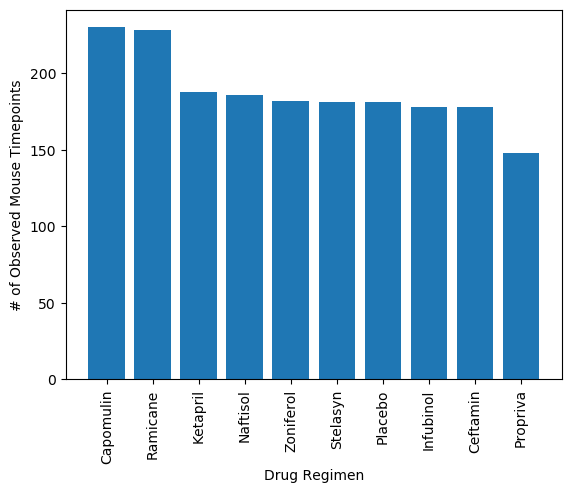

In [47]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = drug_regimen_df.index.values
y_axis = drug_regimen_df.values

drug_regimen_pyplot = plt.bar(x_axis, y_axis, align='center')

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.show()

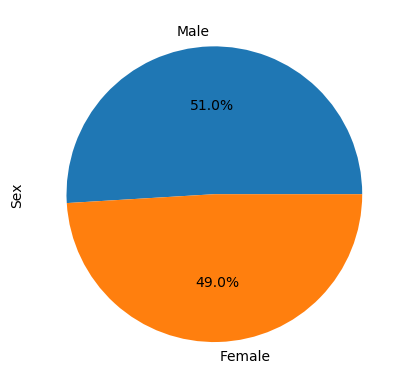

In [51]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mice_sex = clean_df["Sex"].value_counts()

# Make the pie chart
mice_sex.plot.pie(autopct= "%1.1f%%")
plt.show()

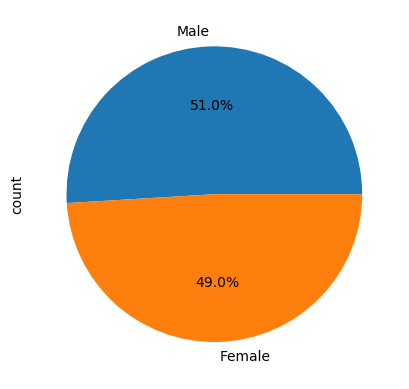

In [73]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
labels = ["Male", "Female"]
sizes = [mice_sex["Male"], mice_sex["Female"]]

# Make the pie chart
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.ylabel("count")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [276]:
# treatment_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

max_df = []
# max_timepoints = [clean_df["Drug Regimen"] == value for value in treatment_drugs]
# max_timepoints
for value in treatment_drugs:
    current_max = 0
    current_max = clean_df.loc[clean_df["Drug Regimen"] == value, :].groupby("Mouse ID").max()["Timepoint"]
    current_vol = pd.DataFrame(current_max)
    max_df.append(current_vol)

# print(max_df)
capomulin_merge = pd.merge(max_df[0], clean_df, on=("Mouse ID","Timepoint"),how="left")

ramicane_merge = pd.merge(max_df[1], clean_df, on=("Mouse ID","Timepoint"),how="left")

infubinol_merge = pd.merge(max_df[2], clean_df, on=("Mouse ID","Timepoint"),how="left")

ceftamin_merge = pd.merge(max_df[3], clean_df, on=("Mouse ID","Timepoint"),how="left")


In [278]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_df.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_timepoint_df = pd.DataFrame(max_timepoint)
max_df = pd.merge(max_timepoint_df, clean_df, on = ["Mouse ID", "Timepoint"], how="left")
max_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [216]:
# max_df[0]
# capomulin_merge

In [196]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers.


    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds

# Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
# Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
# Infubinol's potential outliers: 31    36.321346
# Name: Tumor Volume (mm3), dtype: float64
# Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

In [376]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_capomulin = []
tumor_ramicane = []
tumor_infubinol = []
tumor_ceftamin = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.

# Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in max_df.iterrows():
    if row["Drug Regimen"] == treatment_drugs[0]:
        tumor_capomulin.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatment_drugs[1]:
        tumor_ramicane.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatment_drugs[2]:
        tumor_infubinol.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatment_drugs[3]:
        tumor_ceftamin.append(row['Tumor Volume (mm3)'])

treatment_df = pd.DataFrame({treatment_drugs[0]: tumor_capomulin,
                       treatment_drugs[1]: tumor_ramicane,
                       treatment_drugs[2]: tumor_infubinol,
                       treatment_drugs[3]: tumor_ceftamin
                       })
# Determine outliers using upper and lower bounds
max_outlier = treatment_df.max()
min_outlier = treatment_df.min()

treatment_df

# Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
# Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
# Infubinol's potential outliers: 31    36.321346
# Name: Tumor Volume (mm3), dtype: float64
# Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078
5,47.685963,33.397653,36.321346,47.784682
6,37.311846,37.311236,60.969711,61.849023
7,38.125164,40.659006,62.435404,68.923185
8,38.753265,29.128472,60.918767,67.748662
9,41.483008,33.562402,67.289621,57.918381


In [410]:
# Capomulin
quartile_capomulin = treatment_df[treatment_drugs[0]].quantile([.25, .5, .75])
lowerq_capomulin = quartile_capomulin[.25]
middleq_capomulin = quartile_capomulin[.5]
upperq_capomulin = quartile_capomulin[.75]
iqr_capomulin = upperq_capomulin - lowerq_capomulin

print(f"The lower quartile of capomulin is: {lowerq_capomulin}")
print(f"The upper quartile of capomulin is: {upperq_capomulin}")
print(f"The interquartile range of capomulin is: {iqr_capomulin}")
print(f"The the median of capomulin is: {middleq_capomulin} ")

lower_bound_capomulin = lowerq_capomulin - (1.5*iqr_capomulin)
upper_bound_capomulin = upperq_capomulin + (1.5*iqr_capomulin)

print(f"Values below {lower_bound_capomulin} could be outliers.")
print(f"Values above {upper_bound_capomulin} could be outliers.")

max_capomulin = treatment_df[treatment_drugs[0]].max()
min_capomulin = drug_df[treatment_drugs[0]].min()

if max_capomulin > upper_bound_capomulin:
    print(f"capomulin's potential outliers: {max_capomulin}")
if min_capomulin < lower_bound_capomulin:
    print(f"capomulin's potential outliers: {min_capomulin}")

print("\n")

# Ramicane
quartile_ramicane = treatment_df[treatment_drugs[1]].quantile([.25, .5, .75])
lowerq_ramicane = quartile_ramicane[.25]
middleq_ramicane = quartile_ramicane[.5]
upperq_ramicane = quartile_ramicane[.75]
iqr_ramicane = upperq_ramicane - lowerq_ramicane

print(f"The lower quartile of ramicane is: {lowerq_ramicane}")
print(f"The upper quartile of ramicane is: {upperq_ramicane}")
print(f"The interquartile range of ramicane is: {iqr_ramicane}")
print(f"The the median of ramicane is: {middleq_ramicane} ")

lower_bound_ramicane = lowerq_ramicane - (1.5*iqr_ramicane)
upper_bound_ramicane = upperq_ramicane + (1.5*iqr_ramicane)

print(f"Values below {lower_bound_ramicane} could be outliers.")
print(f"Values above {upper_bound_ramicane} could be outliers.")

max_ramicane = treatment_df[treatment_drugs[1]].max()
min_ramicane = drug_df[treatment_drugs[1]].min()

if max_ramicane > upper_bound_ramicane:
    print(f"ramicane's potential outliers: {max_ramicane}")
if min_ramicane < lower_bound_ramicane:
    print(f"ramicane's potential outliers: {min_ramicane}")

print("\n")

# Infubinol
quartile_infubinol = treatment_df[treatment_drugs[2]].quantile([.25, .5, .75])
lowerq_infubinol = quartile_infubinol[.25]
middleq_infubinol = quartile_infubinol[.5]
upperq_infubinol = quartile_infubinol[.75]
iqr_infubinol = upperq_infubinol - lowerq_infubinol

print(f"The lower quartile of infubinol is: {lowerq_infubinol}")
print(f"The upper quartile of infubinol is: {upperq_infubinol}")
print(f"The interquartile range of infubinol is: {iqr_infubinol}")
print(f"The the median of infubinol is: {middleq_infubinol} ")

lower_bound_infubinol = lowerq_infubinol - (1.5*iqr_infubinol)
upper_bound_infubinol = upperq_infubinol + (1.5*iqr_infubinol)

print(f"Values below {lower_bound_infubinol} could be outliers.")
print(f"Values above {upper_bound_infubinol} could be outliers.")

max_infubinol = treatment_df[treatment_drugs[2]].max()
min_infubinol = drug_df[treatment_drugs[2]].min()

if max_infubinol > upper_bound_infubinol:
    print(f"Infubinol's potential outliers: {max_infubinol}")
if min_infubinol < lower_bound_infubinol:
    print(f"Infubinol's potential outliers: {min_infubinol}")

print("\n")

# Ceftamin
quartile_ceftamin = treatment_df[treatment_drugs[3]].quantile([.25, .5, .75])
lowerq_ceftamin = quartile_ceftamin[.25]
middleq_ceftamin = quartile_ceftamin[.5]
upperq_ceftamin = quartile_ceftamin[.75]
iqr_ceftamin = upperq_ceftamin - lowerq_ceftamin

print(f"The lower quartile of ceftamin is: {lowerq_ceftamin}")
print(f"The upper quartile of ceftamin is: {upperq_ceftamin}")
print(f"The interquartile range of ceftamin is: {iqr_ceftamin}")
print(f"The the median of ceftamin is: {middleq_ceftamin} ")

lower_bound_ceftamin = lowerq_ceftamin - (1.5*iqr_ceftamin)
upper_bound_ceftamin = upperq_ceftamin + (1.5*iqr_ceftamin)

print(f"Values below {lower_bound_ceftamin} could be outliers.")
print(f"Values above {upper_bound_ceftamin} could be outliers.")

max_ceftamin = treatment_df[treatment_drugs[3]].max()
min_ceftamin = drug_df[treatment_drugs[3]].min()

if max_ceftamin > upper_bound_ceftamin:
    print(f"ceftamin's potential outliers: {max_ceftamin}")
if min_ceftamin < lower_bound_ceftamin:
    print(f"ceftamin's potential outliers: {min_ceftamin}")

print("\n")

The lower quartile of capomulin is: 32.37735684
The upper quartile of capomulin is: 40.1592203
The interquartile range of capomulin is: 7.781863460000004
The the median of capomulin is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


The lower quartile of ramicane is: 31.56046955
The upper quartile of ramicane is: 40.65900627
The interquartile range of ramicane is: 9.098536719999998
The the median of ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


The lower quartile of infubinol is: 54.04860769
The upper quartile of infubinol is: 65.52574285
The interquartile range of infubinol is: 11.477135160000003
The the median of infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
Infubinol's potential outliers: 36.3213458


The lower quartile of ceftamin is: 48.72207785
The upper quartile o

In [412]:
print(f"There is an outlier for Infubinol of: {min_infubinol}")

There is an outlier for Infubinol of: 36.3213458


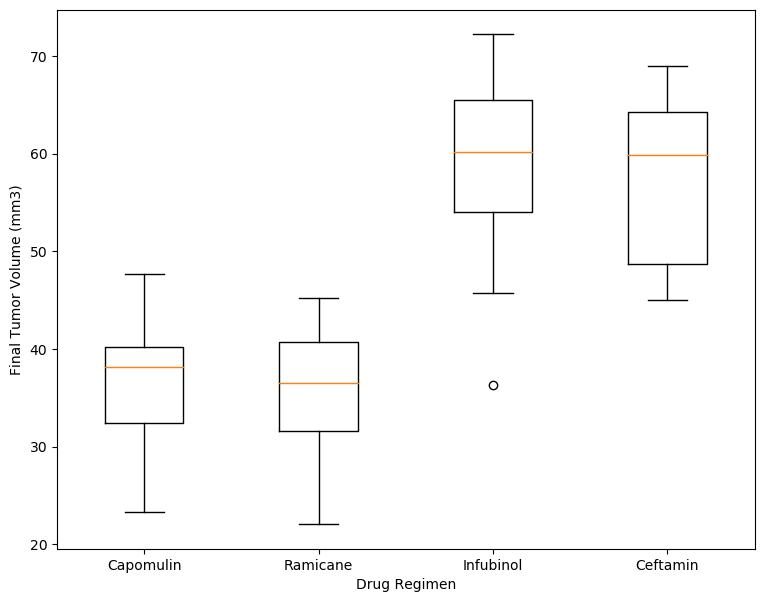

In [416]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot_list = [treatment_df[treatment_drugs[0]],
                treatment_df[treatment_drugs[1]],
                treatment_df[treatment_drugs[2]],
                treatment_df[treatment_drugs[3]]
               ]
# used plt.subplots to define size
fig1, ax = plt.subplots(figsize=(9,7))
ax.set_xlabel('Drug Regimen') 
ax.set_ylabel('Final Tumor Volume (mm3)')

ax.boxplot(boxplot_list, 0)
plt.xticks([1,2,3,4], treatment_drugs) 
plt.savefig('boxplot')
plt.show()

## Line and Scatter Plots

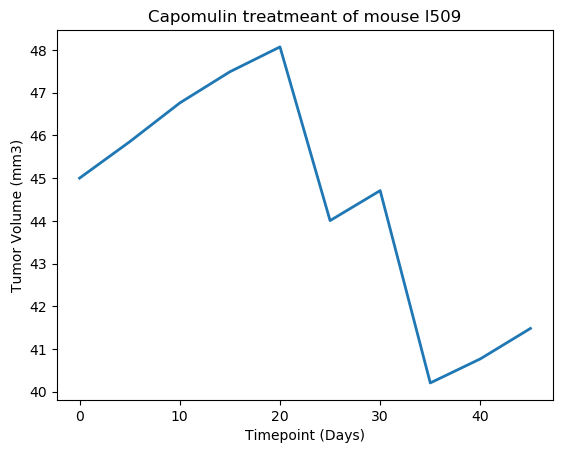

In [426]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

line_df = clean_df.loc[clean_df["Mouse ID"] == "l509",:]
line_df

x_axis = line_df["Timepoint"] 
y_axis = line_df["Tumor Volume (mm3)"] 

plt.title('Capomulin treatmeant of mouse l509') # created title

plt.plot(x_axis, y_axis,linewidth=2, markersize=12) 
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()

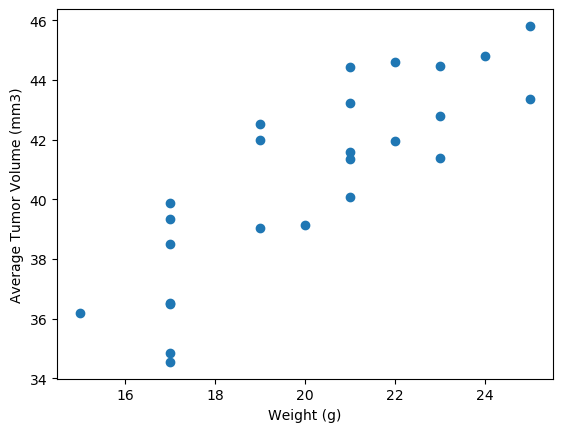

In [434]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin", :]
capomulin_mean = capomulin_df.groupby(["Mouse ID"]).mean()
plt.scatter(capomulin_mean["Weight (g)"], capomulin_mean["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.savefig("scatterplot")
plt.show()


## Correlation and Regression

In [436]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = round(st.pearsonr(capomulin_mean['Weight (g)'],capomulin_mean['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {correlation}")

The correlation between mouse weight and average tumor volume is 0.84


In [438]:
linear_model=st.linregress(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
linear_model

LinregressResult(slope=0.9544396890241049, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

In [444]:
slope = linear_model[0]
intercept = linear_model[1]

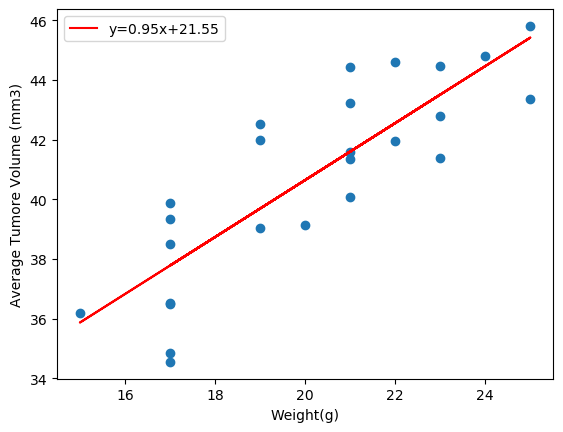

In [446]:
line = slope*(capomulin_mean['Weight (g)'])+intercept

plt.scatter(capomulin_mean['Weight (g)'],capomulin_mean['Tumor Volume (mm3)'])

plt.plot(capomulin_mean['Weight (g)'], line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')

plt.legend()
plt.savefig('linearregression')
plt.show()